# Driver specific plot styling

Create some plots and show the usage of ``fastf1.plotting.get_driver_style``.


In [1]:
from matplotlib import pyplot as plt

import fastf1
from fastf1 import plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

Load the race session.



In [2]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (220.69 MB) /home/rylei/.cache/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', 

## Basic driver-specific plot styling
Plot all the laps for Hamilton, Russel, Perez and Verstappen.
Filter out slow laps as they distort the graph axis.
Note: as LapTime is represented by timedelta, calling ``setup_mpl`` earlier
is required.



req            INFO 	Using cached data for driver_info


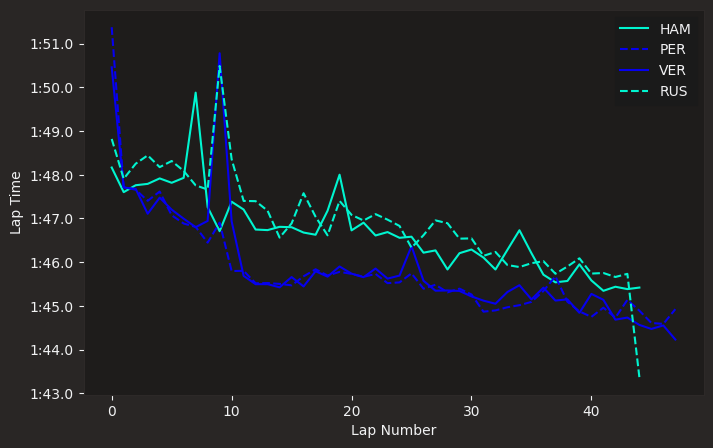

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()

## Sorting the legend
That plot looks pretty good already, but the order of the labels in the
legend is slightly chaotic. Instead of trying to order the labels manually,
use :func:`fastf1.plotting.add_sorted_driver_legend`.
Let's create the exact same plot again, but this time with a sorted legend
which means, we only change the very last function call.



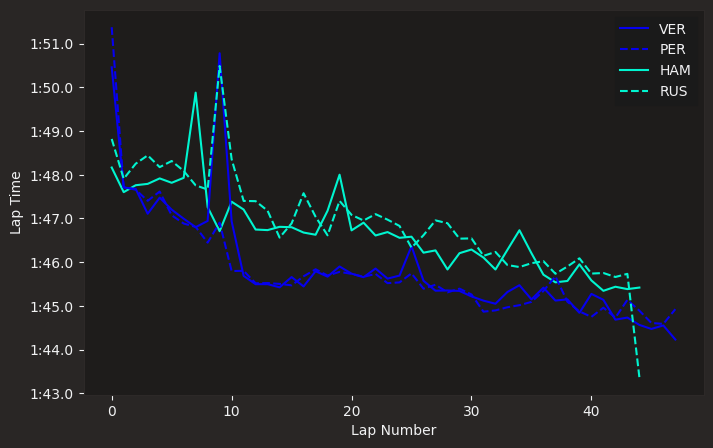

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)

## Creating fully custom styles
If you want to fully customize the plot style, you can define your own
styling variants.

Note that the value ``'auto'`` is treated as a magic keyword when used in
combination with a color. It will be replaced with the team color.

We define two styles, one for the first driver and one for the second driver
in any team.

The plot that is generated here isn't intended to be very readable, but it
shows how you can customize any plot styling parameter.



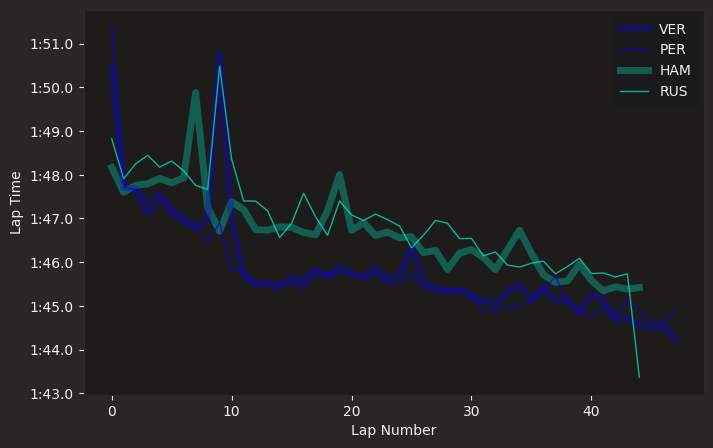

In [5]:
my_styles = [
    # style for each first driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 5, 'alpha': 0.3},
    # style for each second driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 1, 'alpha': 0.7}
]

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()

    # here, we now use ``style=my_style`` to use the custom styling
    style = plotting.get_driver_style(identifier=driver,
                                      style=my_styles,
                                      session=race)

    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
plt.show()